In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from IPython import display

In [2]:
test_c = []
test_o = []

# read test image...
test_image_MRI = "mri0.jpg"
img = image.load_img(test_image_MRI,target_size=(80,60,3))
img = image.img_to_array(img)
norm = img/255
test_c.append(norm)
X = np.array(test_c)

test_image_CT = "ct1.jpg"
img = image.load_img(test_image_CT,target_size=(80,60,3))
img = image.img_to_array(img)
norm = img/255
test_o.append(norm)
X1 = np.array(test_o)

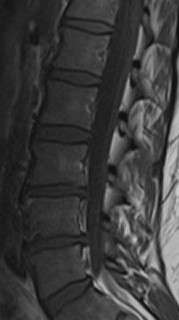

In [3]:
display.Image(test_image_MRI)

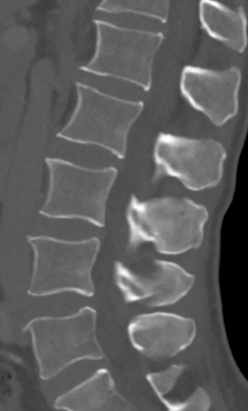

In [4]:
display.Image(test_image_CT)

In [5]:
# load model and weights...
loaded_model = keras.models.load_model("multimodal.h5") 
# evaluate loaded model on test data
loaded_model.compile(optimizer='adam', metrics=['accuracy'])
loaded_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 80, 60, 3)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 80, 60, 3)]  0           []                               
                                                                                                  
 a1 (Conv2D)                    (None, 80, 60, 32)   896         ['img[0][0]']                    
                                                                                                  
 a1c (Conv2D)                   (None, 80, 60, 32)   896         ['input_1[0][0]']                
                                                                                            

In [6]:
y_pred = loaded_model.predict([X, X1])
# perform predictions...
print(test_image_MRI, ' --> Osteoporosis:', y_pred[0]) if np.round(y_pred[0]) == 1 else print(test_image_MRI, ' --> Healthy:', y_pred[0])
print(test_image_CT, ' --> Osteoporosis:', y_pred[1]) if np.round(y_pred[1]) == 1 else print(test_image_CT, ' --> Healthy:', y_pred[1])

1/1 [==============================] - 0s 227ms/step
mri0.jpg  --> Healthy: [[0.00026361]]
ct1.jpg  --> Osteoporosis: [[0.9999999]]
